In [ ]:
# Import tensorflow and print current version
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# Import rest of libraries used in the code. Usually this is done at the beginning of the document but it can be done at any position
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adagrad, Adadelta
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
import os

In [ ]:
# Hyperparameters:
# They must be carefully select depending on the dataset and model

NB_EPOCH = 20       # Number of training epochs
VALIDATION_SPLIT=0.2 # Size of the validation split taken from the training set. If your dataset has validation split, skip this part.

Cargamos el dataset:

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/imagenes/fruits'

Test  Training


In [ ]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/imagenes/fruits/Training'

Banana	Lemon  Orange  Strawberry


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Curso-Jetson/imagenes/fruits/Training', labels='inferred', subset="training", validation_split=VALIDATION_SPLIT, seed=0)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Curso-Jetson/imagenes/fruits/Training', labels='inferred', subset="validation", validation_split=VALIDATION_SPLIT, seed=0)

Found 1953 files belonging to 4 classes.
Using 1563 files for training.
Found 1953 files belonging to 4 classes.
Using 390 files for validation.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

Vamos a visualizar una de las muestras y la clase a la que pertenece:

In [ ]:
import matplotlib.pyplot as plt
sample = list(train_ds.as_numpy_iterator())[0]    # Tupla con el batch
image = sample[0]                                 # Batch de imagenes
label = sample[1]                                 # Batch de labels
plt.imshow(np.squeeze(image[0])/255.0)
print(label[0])

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
# Create a pretrained model.
model = tf.keras.applications.ResNet50(
  include_top=False, weights='imagenet', input_shape=(256,256,3), classes=4)

# Add new classification layer
flat = tf.keras.layers.Flatten()(model.output)
out = tf.keras.layers.Dense(4, activation='softmax')(flat)

model = tf.keras.models.Model(inputs=model.inputs, outputs=out)

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=NB_EPOCH, validation_data=val_ds)

Epoch 1/20
49/49 [==============================] - 1046s 18s/step - loss: 1.6308 - accuracy: 0.8729 - val_loss: 40487.4805 - val_accuracy: 0.2231
Epoch 2/20
49/49 [==============================] - 49s 982ms/step - loss: 0.7117 - accuracy: 0.9501 - val_loss: 3.5819 - val_accuracy: 0.2923
Epoch 3/20
49/49 [==============================] - 48s 976ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 14.2278 - val_accuracy: 0.2923
Epoch 4/20
49/49 [==============================] - 48s 974ms/step - loss: 0.0600 - accuracy: 0.9873 - val_loss: 5.7773 - val_accuracy: 0.2923
Epoch 5/20
49/49 [==============================] - 48s 974ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 6.5227 - val_accuracy: 0.2923
Epoch 6/20
49/49 [==============================] - 48s 975ms/step - loss: 3.3241e-04 - accuracy: 1.0000 - val_loss: 1.9199 - val_accuracy: 0.2923
Epoch 7/20
49/49 [==============================] - 48s 976ms/step - loss: 0.0732 - accuracy: 0.9980 - val_loss: 1.3853 - val_accurac

In [ ]:
model.evaluate(val_ds)

13/13 [==============================] - 4s 269ms/step - loss: 0.4064 - accuracy: 0.9462


[0.4064415693283081, 0.9461538195610046]

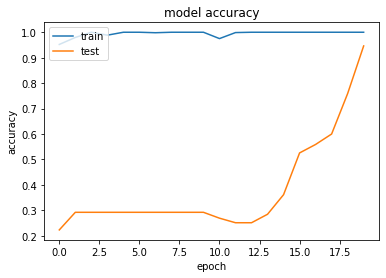

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

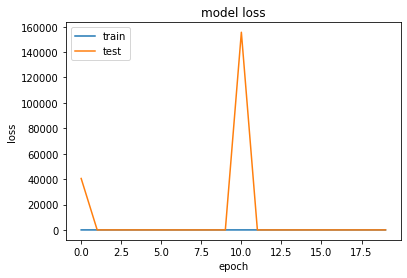

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save model
OUT_MODEL_PATH= '/content/gdrive/MyDrive/Curso-Jetson/models'
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract3.hdf5'))
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract3'))

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Curso-Jetson/models/model-final-pract3/assets


In [ ]:
!ls $OUT_MODEL_PATH

model-final-pract1	 model-final-pract2.hdf5  model-final-pract3.hdf5
model-final-pract1.hdf5  model-final-pract3
